In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Dataset loading

In [ ]:
df_spot=pd.read_excel("/content/drive/MyDrive/Datasets/sunspot_data.xlsx",sheet_name="spots1981-2017")
df_spot.drop(columns=["Unknown_var"],inplace=True)

In [ ]:
df_spot.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
21831,11830609.0,1435.0,S11E43,B,4205.0,BXO,5.0,5.0,10.0,830612.8,830612.6,955.0,3BOUL
168620,11980814.0,1430.0,N20E57,(B,8303.0,,NaN,NaN,NaN,980819.0,980818.9,NaN,MWIL
157380,11950106.0,1800.0,S12E34,(AP,7823.0,,NaN,NaN,NaN,NaN,NaN,NaN,MWIL
138293,11920717.0,13.0,N09E01,B,7227.0,CAO,11.0,9.0,30.0,920717.1,920717.1,271.0,2LEAR
80336,11891116.0,1242.0,N13W41,BD,5786.0,EKO,11.0,13.0,470.0,891113.4,891113.3,561.0,3RAMY


In [ ]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271883 entries, 0 to 271882
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                271881 non-null  float64
 1   Time                271881 non-null  float64
 2   Location            271883 non-null  object 
 3   Mount Wilson Class  271883 non-null  object 
 4   Region_number       269734 non-null  float64
 5   McIntosh_class      271883 non-null  object 
 6   Number of sunspots  235038 non-null  float64
 7   length              224321 non-null  float64
 8   area                221352 non-null  float64
 9   individual date     212809 non-null  float64
 10  regional date       182341 non-null  float64
 11  station_number      234586 non-null  float64
 12  observartories      271883 non-null  object 
dtypes: float64(9), object(4)
memory usage: 27.0+ MB


##checking null values

In [ ]:
df_spot.isna().sum()

Date                      2
Time                      2
Location                  0
Mount Wilson Class        0
Region_number          2149
McIntosh_class            0
Number of sunspots    36845
length                47562
area                  50531
individual date       59074
regional date         89542
station_number        37297
observartories            0
dtype: int64

#Dropped null values from date and time column because want to convert these values into date time format with null values can't convert it

In [ ]:
df_spot.dropna(subset=["Date","Time"],inplace=True)

In [ ]:
df_spot.isna().sum()

Date                      0
Time                      0
Location                  0
Mount Wilson Class        0
Region_number          2149
McIntosh_class            0
Number of sunspots    36844
length                47561
area                  50530
individual date       59073
regional date         89541
station_number        37296
observartories            0
dtype: int64

##creating copy of dataset to play with

In [ ]:
df_spot_copy=df_spot.copy()

to convert Date into datetime format first the date column is listed as float so changed it into into int to remove trailing zero then converted it into str to remove first two charachters of ID

In [ ]:
df_spot_copy['Date']=df_spot_copy['Date'].astype(int)

In [ ]:
df_spot_copy['Date']=df_spot_copy['Date'].astype(str)

In [ ]:
df_spot_copy['Date']=df_spot_copy['Date'].str[2:]

In [ ]:
df_spot_copy.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
153360,940212,1537.0,N06E79,A,7670.0,AX,1.0,NaN,NaN,940218.6,940219.0,28.0,3HOLL
2036,820122,1249.0,S12W75,B,3559.0,DKO,4.0,5.0,310.0,820116.9,820117.7,17.0,2RAMY
9854,820710,130.0,S24E50,B,3806.0,DRO,6.0,3.0,20.0,820713.9,820713.8,289.0,3LEAR
249771,120707,940.0,S15E43,A,1519.0,HSX,1.0,1.0,70.0,120710.7,NaN,147.0,3SVTO
46210,880328,812.0,S21E54,B,4978.0,DSI,23.0,9.0,340.0,NaN,NaN,272.0,3LEAR


used to_datetime function to convert it into date format

In [ ]:
df_spot_copy['Date']=pd.to_datetime(df_spot_copy['Date'],format="%y%m%d",errors='coerce')

In [ ]:
df_spot_copy.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
90043,1990-05-09,33.0,S17E49,B,6054.0,DAO,9.0,6.0,140.0,900512.7,900512.7,189.0,3LEAR
162885,1997-08-12,1152.0,S19W36,B,8070.0,BXO,8.0,6.0,20.0,NaN,NaN,71.0,4RAMY
106243,1991-02-07,807.0,S15W67,A,6473.0,HS,1.0,1.0,90.0,NaN,NaN,43.0,4SVTO
119107,1991-08-13,1810.0,S22W38,A,6767.0,DAX,2.0,1.0,NaN,910810.8,910811.1,438.0,3PALE
47093,1988-04-28,1350.0,S22W02,B,5003.0,BXO,4.0,3.0,10.0,880428.4,880428.4,91.0,4RAMY


now have to convert time column into time format

In [ ]:
df_spot_copy['Time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 271879 entries, 0 to 271882
Series name: Time
Non-Null Count   Dtype  
--------------   -----  
271879 non-null  float64
dtypes: float64(1)
memory usage: 4.1 MB


it's also listed as float so have to convert it into int then str

In [ ]:
df_spot_copy['Time']=df_spot_copy['Time'].astype(int)

In [ ]:
df_spot_copy.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
89758,1990-05-09,33,N14W60,B,6053.0,BXO,6.0,7.0,60.0,NaN,NaN,187.0,3LEAR
223988,2002-12-05,1215,S20W07,A,209.0,HSX,1.0,2.0,100.0,NaN,NaN,419.0,2SVTO
206803,2001-09-10,1445,S16W06,(BG,9607.0,,NaN,NaN,NaN,10910.1,10910.3,NaN,MWIL
106979,1991-02-07,2137,S12E78,B,6488.0,BXO,2.0,9.0,NaN,910213.8,910213.1,63.0,3PALE
129667,1992-01-22,1550,N03E28,B,7016.0,CKO,10.0,9.0,390.0,920124.7,920124.8,9.0,2HOLL


In [ ]:
df_spot_copy['Time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 271879 entries, 0 to 271882
Series name: Time
Non-Null Count   Dtype
--------------   -----
271879 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


now we can see it's in the integer format next step is to convert it into str

In [ ]:
df_spot_copy['Time']=df_spot_copy['Time'].astype(str)

In [ ]:
df_spot_copy.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
27606,1984-01-10,1000,S17E69,A,4392.0,HHX,1.0,2.0,120.0,840115.7,840115.2,5.0,2ATHN
91084,1990-06-06,1740,S19W74,B,6093.0,DAO,7.0,7.0,100.0,NaN,NaN,210.0,4PALE
255840,2013-09-18,16,S18E60,A,1845.0,HRX,1.0,1.0,20.0,130922.6,NaN,249.0,3LEAR
110446,1991-04-14,122,S10W61,B,6570.0,ESO,16.0,12.0,210.0,NaN,NaN,167.0,3LEAR
53215,1988-09-21,1317,S17W62,B,5155.0,BXO,4.0,5.0,10.0,880916.8,880916.9,241.0,4RAMY


In [ ]:
df_spot_copy['Time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 271879 entries, 0 to 271882
Series name: Time
Non-Null Count   Dtype 
--------------   ----- 
271879 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [ ]:
df_spot_copy['Time']=pd.to_datetime(df_spot_copy['Time'],format="%H%M",errors="coerce").dt.time

In [ ]:
df_spot_copy.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
227513,2003-04-30,12:20:00,N05E84,A,351.0,HSX,1.0,2.0,30.0,NaN,NaN,146.0,2RAMY
48509,1988-06-09,08:45:00,S21W28,GD,5034.0,CK,7.0,4.0,160.0,NaN,NaN,93.0,2SVTO
11889,1982-09-03,15:15:00,S15W28,(BP,3879.0,,NaN,NaN,NaN,820901.5,820901.6,NaN,MWIL
80440,1989-11-19,16:45:00,S26W29,B,5793.0,EAI,28.0,12.0,260.0,891117.4,891117.4,392.0,2BOUL
235899,2004-11-18,15:08:00,S14W48,A,699.0,AXX,2.0,1.0,NaN,41115.0,41115.1,202.0,4HOLL


In [ ]:
df_spot_copy.isna().sum()

Date                      1
Time                   4426
Location                  0
Mount Wilson Class        0
Region_number          2149
McIntosh_class            0
Number of sunspots    36844
length                47561
area                  50530
individual date       59073
regional date         89541
station_number        37296
observartories            0
dtype: int64

In [ ]:
df_spot_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271879 entries, 0 to 271882
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                271878 non-null  datetime64[ns]
 1   Time                267453 non-null  object        
 2   Location            271879 non-null  object        
 3   Mount Wilson Class  271879 non-null  object        
 4   Region_number       269730 non-null  float64       
 5   McIntosh_class      271879 non-null  object        
 6   Number of sunspots  235035 non-null  float64       
 7   length              224318 non-null  float64       
 8   area                221349 non-null  float64       
 9   individual date     212806 non-null  float64       
 10  regional date       182338 non-null  float64       
 11  station_number      234583 non-null  float64       
 12  observartories      271879 non-null  object        
dtypes: datetime64[ns](1), float64

In [ ]:
df_spot_copy['Number of sunspots'].unique()

array([32., 16., 22., 31., 17.,  5., 25.,  7., nan,  3.,  2.,  4.,  1.,
       15., 19., 35., 21., 10., 26.,  8.,  6., 13., 42., 70., 46., 12.,
       92., 14., 38.,  9., 11., 27., 18., 20., 34., 37., 29., 33., 40.,
       36., 51., 44., 47., 45., 28., 23., 24., 81., 30., 54., 50., 48.,
       63., 71., 52., 58., 56., 76., 68., 82., 73., 62., 53., 79., 69.,
       74., 65., 59., 55., 39., 41., 43., 77., 80., 93., 87., 90., 84.,
       78., 60., 49., 66., 57., 61., 97., 83., 64., 72., 96., 75., 88.,
       67., 91., 94.,  0., 99., 85., 98., 86., 95., 89.])

Text(0, 0.5, 'Xray_flux')

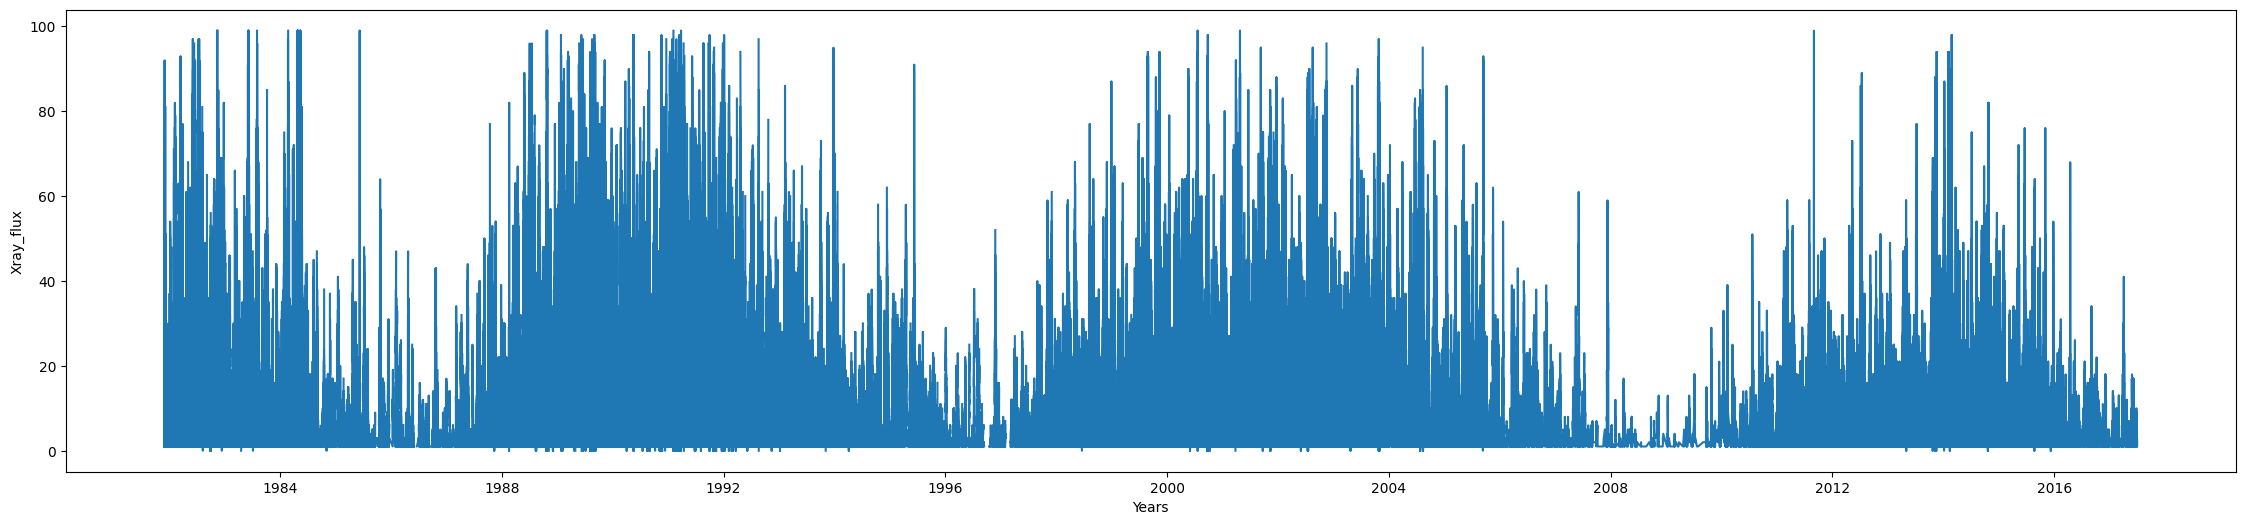

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df_spot_copy['Date'],df_spot_copy['Number of sunspots'])
plt.xlabel("Years")
plt.ylabel("Xray_flux")
#plt.yscale("log")

we can clearly see the 11 year solar cycle solar minimum and solar maximum

---
this also verifes our asumption from flares data set where we see high xray flux around 2002 which is the solar maximum time

---
Can you visually identify a pattern of sunspots that are most likely to
produce significant flares?

---

i think this graph here and the other graph in flare dataset answer this question when the number of sunspot is high, they are producing X class or M class flares we can see this through these two graphs



In [ ]:
start_date=pd.to_datetime("1996-01-01")
end_date=pd.to_datetime("2008-12-01")
filtered_df = df_spot_copy[(df_spot_copy['Date'] >= start_date) & (df_spot_copy['Date'] <= end_date)]


In [ ]:
filtered_df.sample(5)

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
166582,1998-05-19,17:00:00,N22W28,B,8222.0,CSO,14.0,15.0,250.0,980517.5,980517.6,94.0,1HOLL
223648,2002-11-21,16:40:00,S19W68,A,194.0,HSX,1.0,1.0,50.0,21116.5,21117.0,514.0,4HOLL
219922,2002-08-14,14:45:00,S13W07,(BF,78.0,,NaN,NaN,NaN,20814.1,20814.0,NaN,MWIL
224303,2002-12-16,05:05:00,N06E05,BG,227.0,DSO,10.0,6.0,80.0,21216.4,21216.4,512.0,1LEAR
218268,2002-06-26,05:43:00,S27E23,B,15.0,DSO,9.0,5.0,50.0,20628.0,20627.8,250.0,3SVTO


Text(0, 0.5, 'number of Spots')

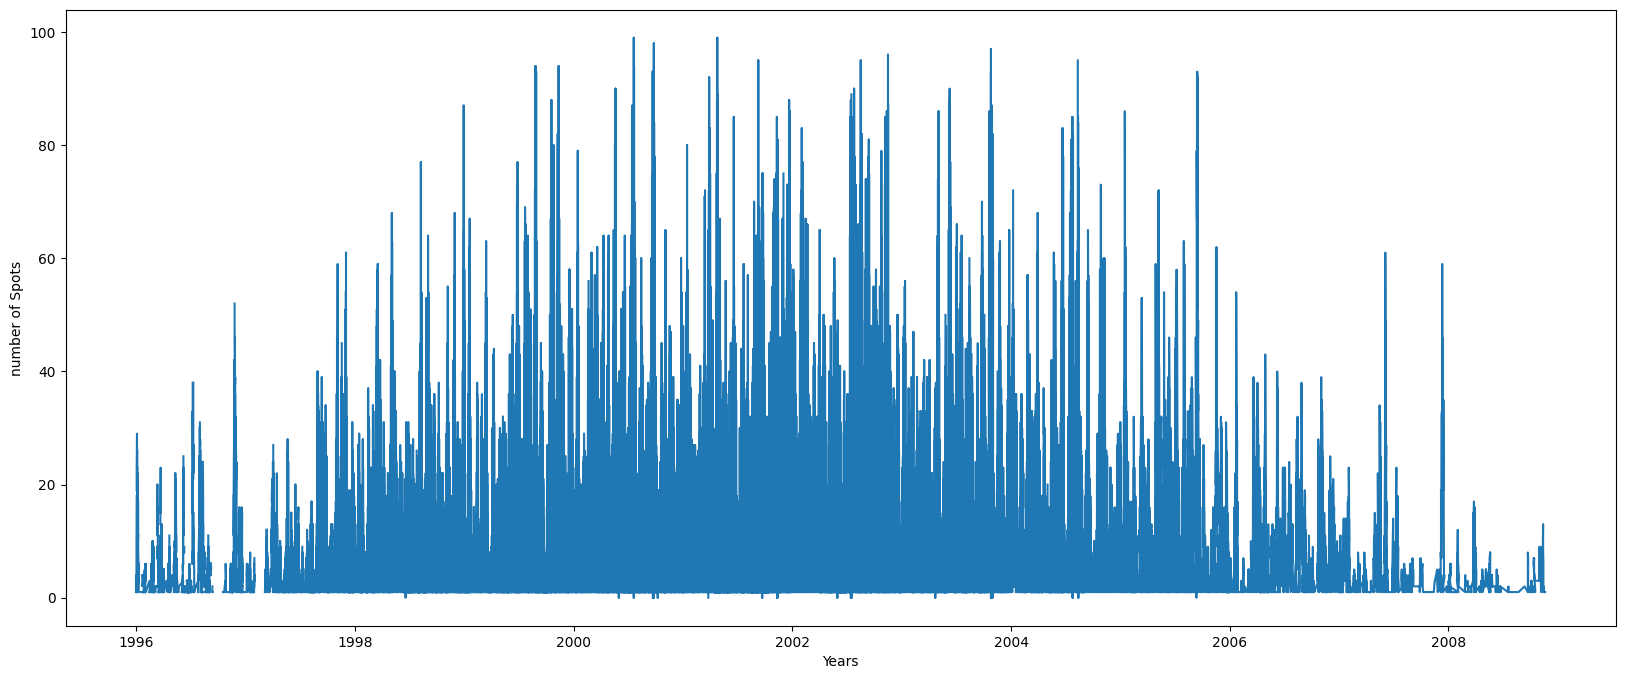

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(filtered_df['Date'],filtered_df['Number of sunspots'])
plt.xlabel("Years")
plt.ylabel("number of Spots")
#plt.yscale("log")

complete solar cycle start from 1996 end at 2008

In [ ]:
df_spot_copy_1=df_spot_copy.copy()

In [ ]:
df_spot_copy_1.set_index('Date', inplace=True)

In [ ]:
df_spot_copy_1.head()

,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
Date,,,,,,,,,,,,
1981-12-01,02:01:00,N13W46,BG,3478.0,EKI,32.0,12.0,600.0,811127.5,811127.5,938.0,4LEAR
1981-12-01,11:05:00,N13W46,,3478.0,EHI,16.0,11.0,530.0,811127.6,811127.5,205.0,2MANI
1981-12-01,21:00:00,N12W47,BG,3478.0,EHO,22.0,14.0,710.0,811127.5,811127.5,626.0,2PALE
1981-12-01,13:55:00,N15W56,BG,3478.0,EHI,31.0,13.0,670.0,811127.3,811127.5,468.0,2RAMY
1981-12-01,15:35:00,N13W55,BG,3478.0,EHI,17.0,13.0,430.0,811127.5,811127.5,624.0,2HOLL


In [ ]:
monthly_mean = df_spot_copy_1['Number of sunspots'].resample('M').mean()
monthly_mean

Date
1981-12-31    6.720370
1982-01-31    6.413019
1982-02-28    7.795775
1982-03-31    8.932520
1982-04-30    6.331343
                ...   
2017-02-28    3.078125
2017-03-31    5.164706
2017-04-30    5.405229
2017-05-31    3.540541
2017-06-30    4.228070
Name: Number of sunspots, Length: 427, dtype: float64

Text(0.5, 1.0, 'Monthly mean number of Sunspots')

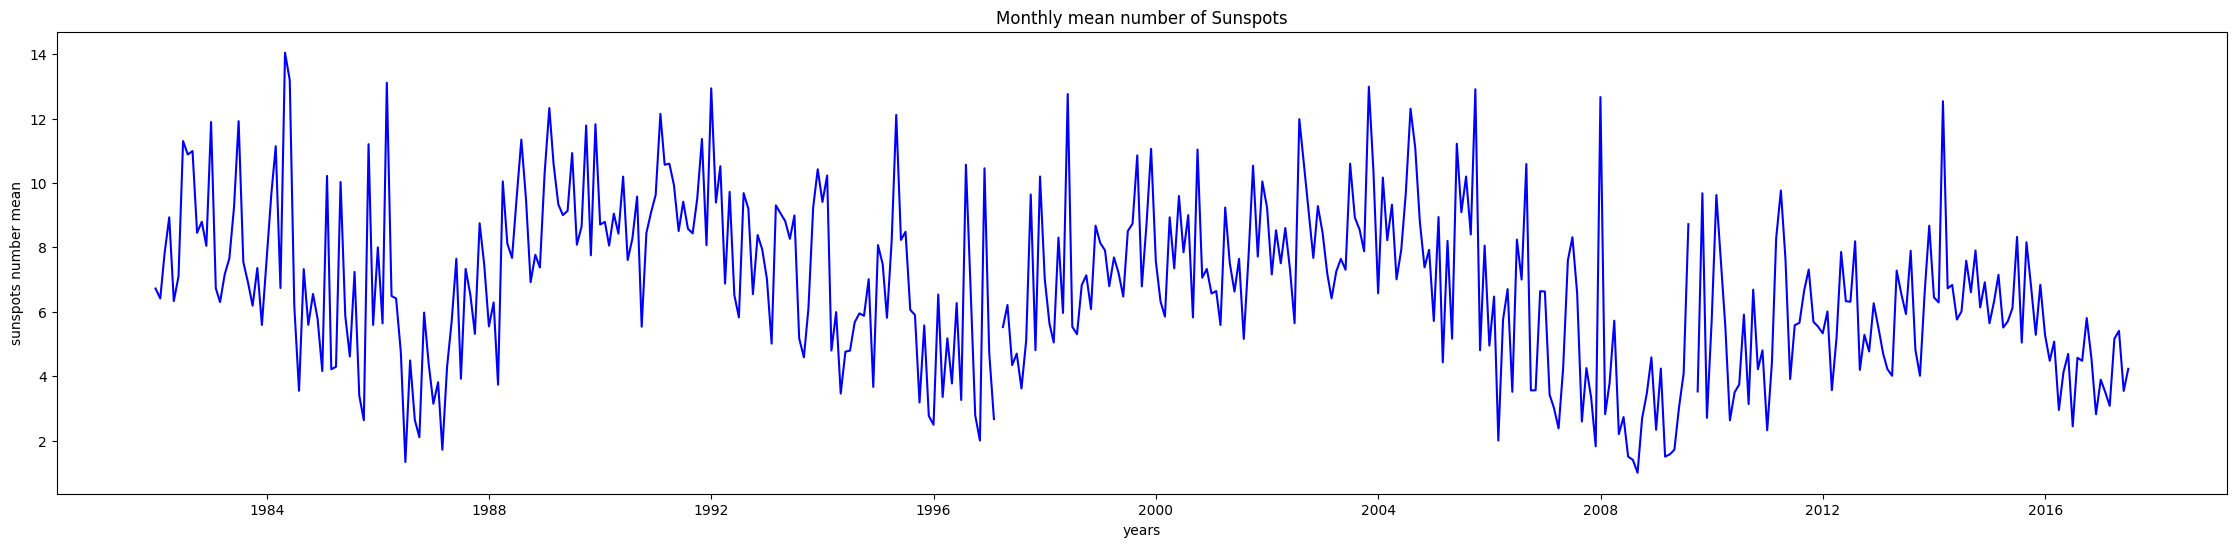

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(monthly_mean.index, monthly_mean, label='Monthly Mean Sunspots', linestyle='-', color='blue')
plt.ylabel("sunspots number mean")
plt.xlabel("years")
plt.title("Monthly mean number of Sunspots")

In [ ]:
df_spot_copy.to_csv("/content/drive/MyDrive/Datasets/sunspot_dataset_v1.csv",index=False)

###Model for Sunspot Prediction

In [ ]:
#copy of data set
model_df=df_spot_copy.copy()

In [ ]:
model_df.head()

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
0,1981-12-01,02:01:00,N13W46,BG,3478.0,EKI,32.0,12.0,600.0,811127.5,811127.5,938.0,4LEAR
1,1981-12-01,11:05:00,N13W46,,3478.0,EHI,16.0,11.0,530.0,811127.6,811127.5,205.0,2MANI
2,1981-12-01,21:00:00,N12W47,BG,3478.0,EHO,22.0,14.0,710.0,811127.5,811127.5,626.0,2PALE
3,1981-12-01,13:55:00,N15W56,BG,3478.0,EHI,31.0,13.0,670.0,811127.3,811127.5,468.0,2RAMY
4,1981-12-01,15:35:00,N13W55,BG,3478.0,EHI,17.0,13.0,430.0,811127.5,811127.5,624.0,2HOLL


##Cleaning dataset for model building

In [ ]:
model_df.drop(columns=["Time","Location","Mount Wilson Class","individual date","regional date","station_number","observartories","Region_number"],inplace=True)

In [ ]:
model_df.head()

,Date,McIntosh_class,Number of sunspots,length,area
0,1981-12-01,EKI,32.0,12.0,600.0
1,1981-12-01,EHI,16.0,11.0,530.0
2,1981-12-01,EHO,22.0,14.0,710.0
3,1981-12-01,EHI,31.0,13.0,670.0
4,1981-12-01,EHI,17.0,13.0,430.0


In [ ]:
model_df.isna().sum()

Date                      1
McIntosh_class            0
Number of sunspots    36844
length                47561
area                  50530
dtype: int64

dropping rows with null values in region number and date and filling the null values of number of sunspots, length , area with the mean of that

In [ ]:
model_df.dropna(subset=["Date"],inplace=True)

In [ ]:
model_df['Number of sunspots']=model_df['Number of sunspots'].fillna(model_df['Number of sunspots'].mean())
model_df['length']=model_df['length'].fillna(model_df['length'].mean())
model_df['area']=model_df['area'].fillna(model_df['area'].mean())

In [ ]:
model_df.isna().sum()

Date                  0
McIntosh_class        0
Number of sunspots    0
length                0
area                  0
dtype: int64

#transformation of McIntosh_class

In [ ]:
model_df[['Class0', 'Class1', 'Class2',"Class3"]] = model_df['McIntosh_class'].str.split('', expand=True).iloc[:, 1:5]
model_df.head()

,Date,McIntosh_class,Number of sunspots,length,area,Class0,Class1,Class2,Class3
0,1981-12-01,EKI,32.0,12.0,600.0,,E,K,I
1,1981-12-01,EHI,16.0,11.0,530.0,,E,H,I
2,1981-12-01,EHO,22.0,14.0,710.0,,E,H,O
3,1981-12-01,EHI,31.0,13.0,670.0,,E,H,I
4,1981-12-01,EHI,17.0,13.0,430.0,,E,H,I


In [ ]:
model_df.drop(columns=["Class0","McIntosh_class"],inplace=True)

In [ ]:
class_1={"A":0.10,"H":0.15,"B":0.30,"C":0.45,"D":0.60,"E":0.75,"F":0.90}
class_2={"X":0,"R":0.10,"S":0.30,"A":0.50,"H":0.70,"K":0.90}
class_3={"X":0,"O":0.10,"C":0.90,"I":0.50}

def map_class_1(class_1_value):
    return class_1.get(class_1_value, pd.NA)

def map_class_2(class_2_value):
    return class_2.get(class_2_value, pd.NA)

def map_class_3(class_3_value):
    return class_3.get(class_3_value, pd.NA)

In [ ]:
model_df["numeric_class_1"]=model_df['Class1'].apply(map_class_1)
model_df["numeric_class_2"]=model_df['Class2'].apply(map_class_2)
model_df["numeric_class_3"]=model_df['Class3'].apply(map_class_3)


In [ ]:
model_df.sample(5)

,Date,Number of sunspots,length,area,Class1,Class2,Class3,numeric_class_1,numeric_class_2,numeric_class_3
6418,1982-04-13,5.0,8.000000,210.000000,D,S,O,0.6,0.3,0.1
235099,2004-08-23,1.0,6.062746,146.546858,H,R,X,0.15,0.1,0
204861,2001-07-21,1.0,2.000000,80.000000,H,S,X,0.15,0.3,0
254087,2013-05-16,6.0,9.000000,100.000000,D,S,O,0.6,0.3,0.1
255294,2013-08-08,5.0,3.000000,20.000000,C,R,O,0.45,0.1,0.1


#cleaning this transformed dataset

In [ ]:
model_df.isna().sum()

Date                      0
Number of sunspots        0
length                    0
area                      0
Class1                    0
Class2                    0
Class3                    0
numeric_class_1       36969
numeric_class_2       37030
numeric_class_3       76113
dtype: int64

In [ ]:
model_df.dropna(subset=["numeric_class_1","numeric_class_2","numeric_class_3"],inplace=True)

In [ ]:
model_df.isna().sum()

Date                  0
Number of sunspots    0
length                0
area                  0
Class1                0
Class2                0
Class3                0
numeric_class_1       0
numeric_class_2       0
numeric_class_3       0
dtype: int64

In [ ]:
model_df.drop(columns=["Class1","Class2","Class3"],inplace=True)

In [ ]:
model_df.head()

,Date,Number of sunspots,length,area,numeric_class_1,numeric_class_2,numeric_class_3
0,1981-12-01,32.0,12.0,600.0,0.75,0.9,0.5
1,1981-12-01,16.0,11.0,530.0,0.75,0.7,0.5
2,1981-12-01,22.0,14.0,710.0,0.75,0.7,0.1
3,1981-12-01,31.0,13.0,670.0,0.75,0.7,0.5
4,1981-12-01,17.0,13.0,430.0,0.75,0.7,0.5


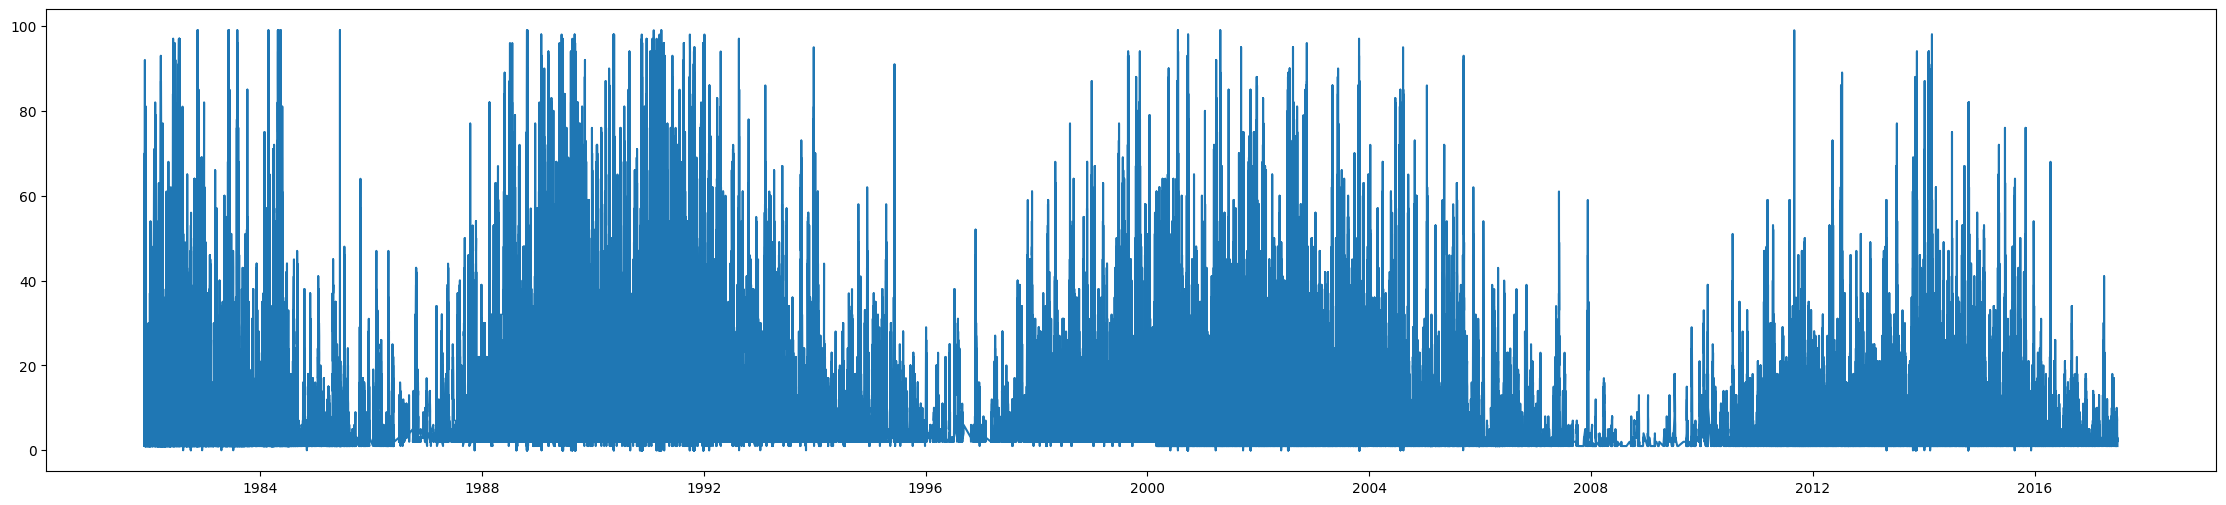

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(model_df['Date'],model_df["Number of sunspots"])

In [ ]:
model_df.shape

(195698, 7)

In [ ]:
filtered_df=model_df[model_df['Date']>="2001-12-01"]

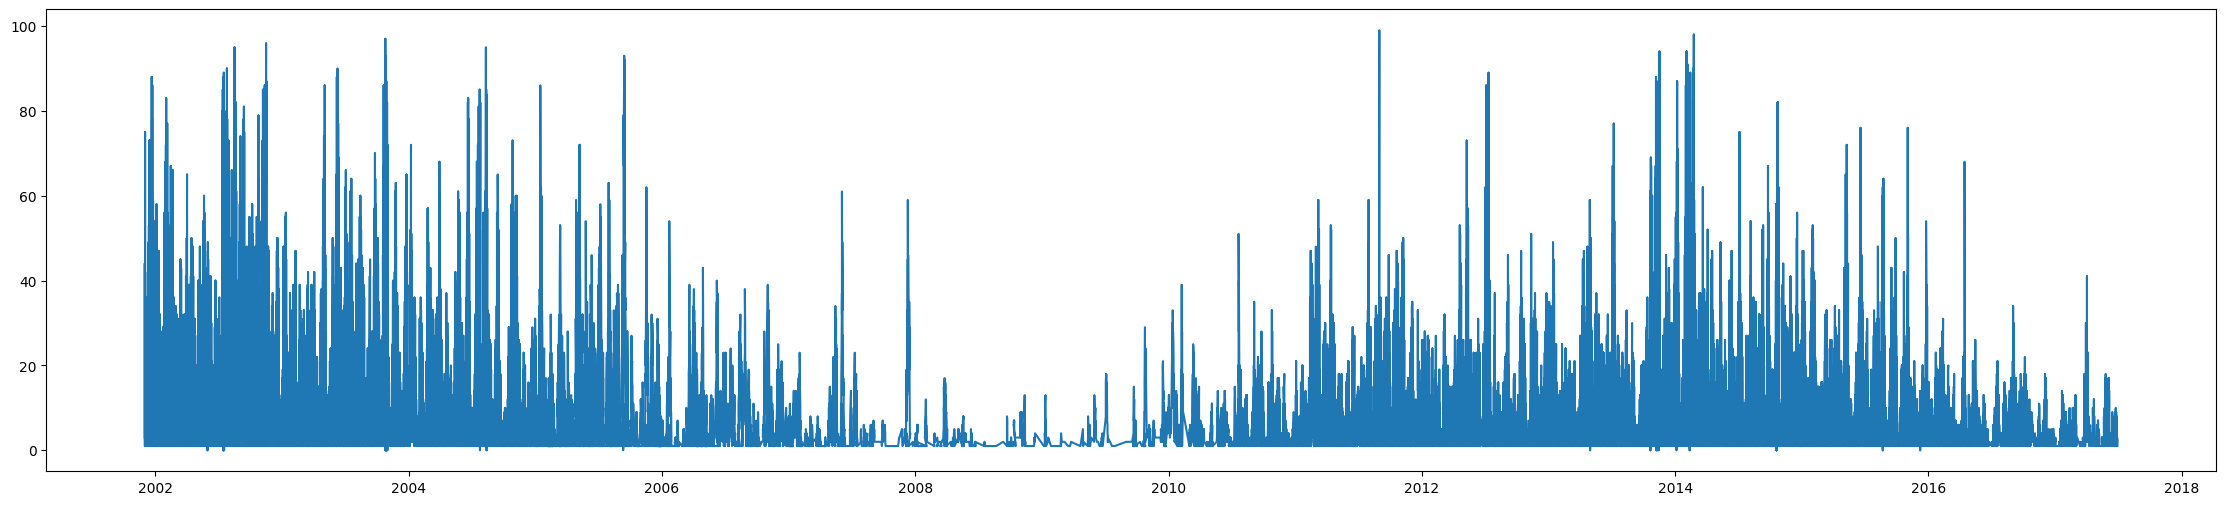

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(filtered_df['Date'],filtered_df["Number of sunspots"])

In [ ]:
filtered_df.shape

(56653, 7)

In [ ]:
model_df.head()

,Date,Number of sunspots,length,area,numeric_class_1,numeric_class_2,numeric_class_3
0,1981-12-01,32.0,12.0,600.0,0.75,0.9,0.5
1,1981-12-01,16.0,11.0,530.0,0.75,0.7,0.5
2,1981-12-01,22.0,14.0,710.0,0.75,0.7,0.1
3,1981-12-01,31.0,13.0,670.0,0.75,0.7,0.5
4,1981-12-01,17.0,13.0,430.0,0.75,0.7,0.5


In [ ]:
model_df["Month"]=model_df['Date'].dt.to_period('M')

In [ ]:
mean_value=model_df.groupby("Month")["Number of sunspots"].mean().reset_index()
mean_value

,Month,Number of sunspots
0,1981-12,6.720370
1,1982-01,6.415350
2,1982-02,7.803177
3,1982-03,8.933908
4,1982-04,6.335325
...,...,...
420,2017-02,3.078125
421,2017-03,5.164706
422,2017-04,5.405229
423,2017-05,3.540541


In [ ]:
mean_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   Month               425 non-null    period[M]
 1   Number of sunspots  425 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 6.8 KB


In [ ]:
mean_value.isnull().sum()

Month                 0
Number of sunspots    0
dtype: int64

In [ ]:
mean_value['Number of sunspots'].shape

(425,)

In [ ]:
mean_value['Month'].shape

(425,)

####Monthly Mean number of sunspots

In [ ]:
monthly_mean = df_spot_copy_1['Number of sunspots'].resample('M').mean()


In [ ]:
X=monthly_mean.values
y=monthly_mean.index

In [ ]:
print(X.shape)
print(y.shape)

(427,)
(427,)


In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
df = pd.DataFrame({"date": y, "value": X})
df = df.set_index("date")

In [ ]:
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["lag_1"] = df["value"].shift(1)  # Lag feature (example)

In [ ]:
df.head()

,value,month,day_of_week,lag_1
date,,,,
1981-12-31,6.720370,12,3,NaN
1982-01-31,6.413019,1,6,6.720370
1982-02-28,7.795775,2,6,6.413019
1982-03-31,8.932520,3,2,7.795775
1982-04-30,6.331343,4,4,8.932520


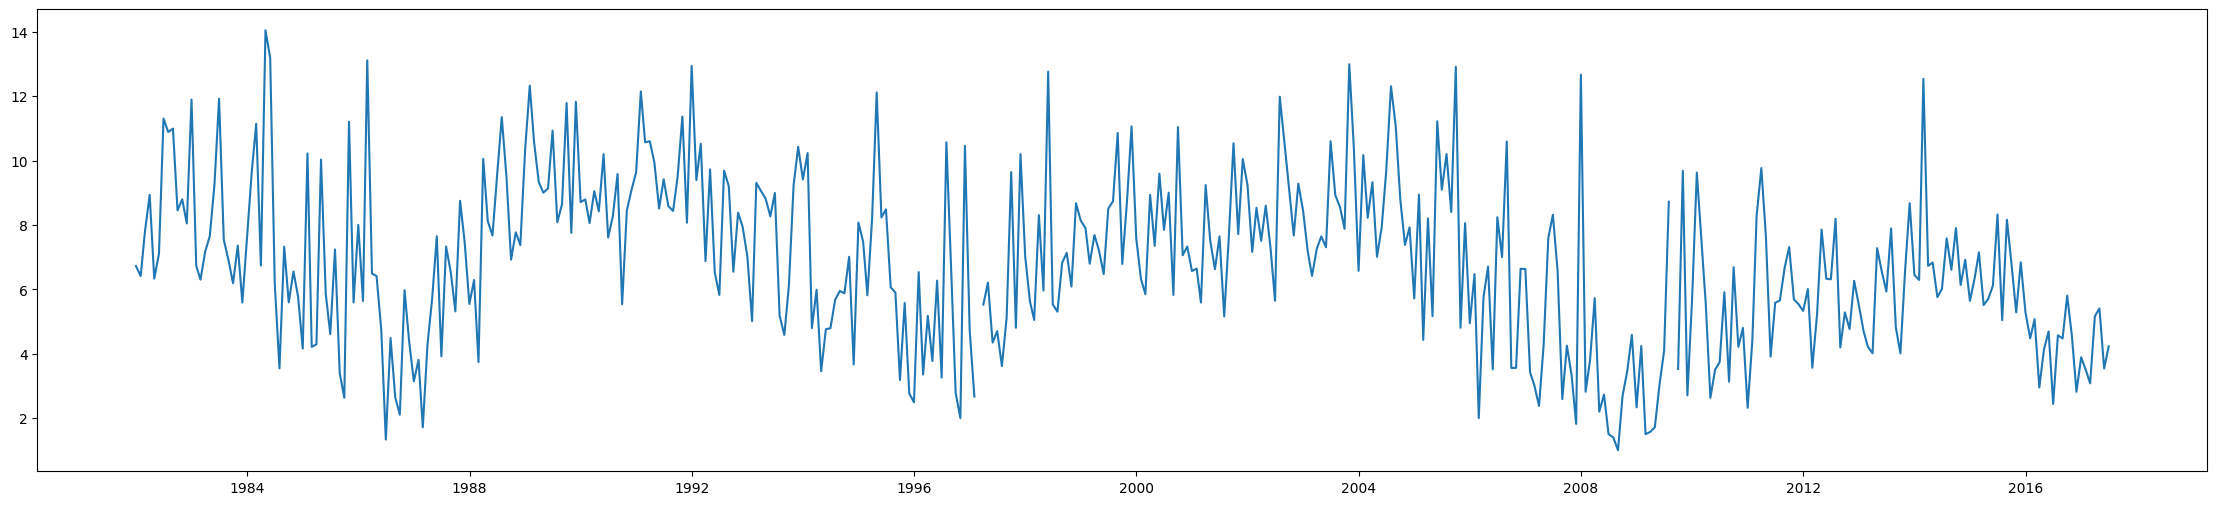

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'])


In [ ]:
df.isna().sum()

value          2
month          0
day_of_week    0
lag_1          3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

value          0
month          0
day_of_week    0
lag_1          0
dtype: int64

##XGBoost Regressor



In [ ]:
X = df.drop("value", axis=1)  # Features
y = df["value"]  # Target variable

In [ ]:
X_train=X.iloc[0:240,0:5]
X_test=X.iloc[241:,0:5]

In [ ]:
y_train=y.iloc[0:240]
y_test=y.iloc[241:]

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=110, max_depth=2, learning_rate=0.1, early_stopping_rounds=3)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])



[0]	validation_0-rmse:2.82914
[1]	validation_0-rmse:2.77254
[2]	validation_0-rmse:2.72460
[3]	validation_0-rmse:2.68427
[4]	validation_0-rmse:2.64908
[5]	validation_0-rmse:2.61926
[6]	validation_0-rmse:2.59943
[7]	validation_0-rmse:2.57752
[8]	validation_0-rmse:2.55804
[9]	validation_0-rmse:2.54604
[10]	validation_0-rmse:2.53964
[11]	validation_0-rmse:2.53924
[12]	validation_0-rmse:2.53620
[13]	validation_0-rmse:2.52532
[14]	validation_0-rmse:2.52260
[15]	validation_0-rmse:2.52487
[16]	validation_0-rmse:2.52282
[17]	validation_0-rmse:2.52129
[18]	validation_0-rmse:2.51882
[19]	validation_0-rmse:2.51726
[20]	validation_0-rmse:2.51768
[21]	validation_0-rmse:2.51480
[22]	validation_0-rmse:2.50628
[23]	validation_0-rmse:2.50672
[24]	validation_0-rmse:2.51097


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=3,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=110, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

MAE: 2.0519231748071673


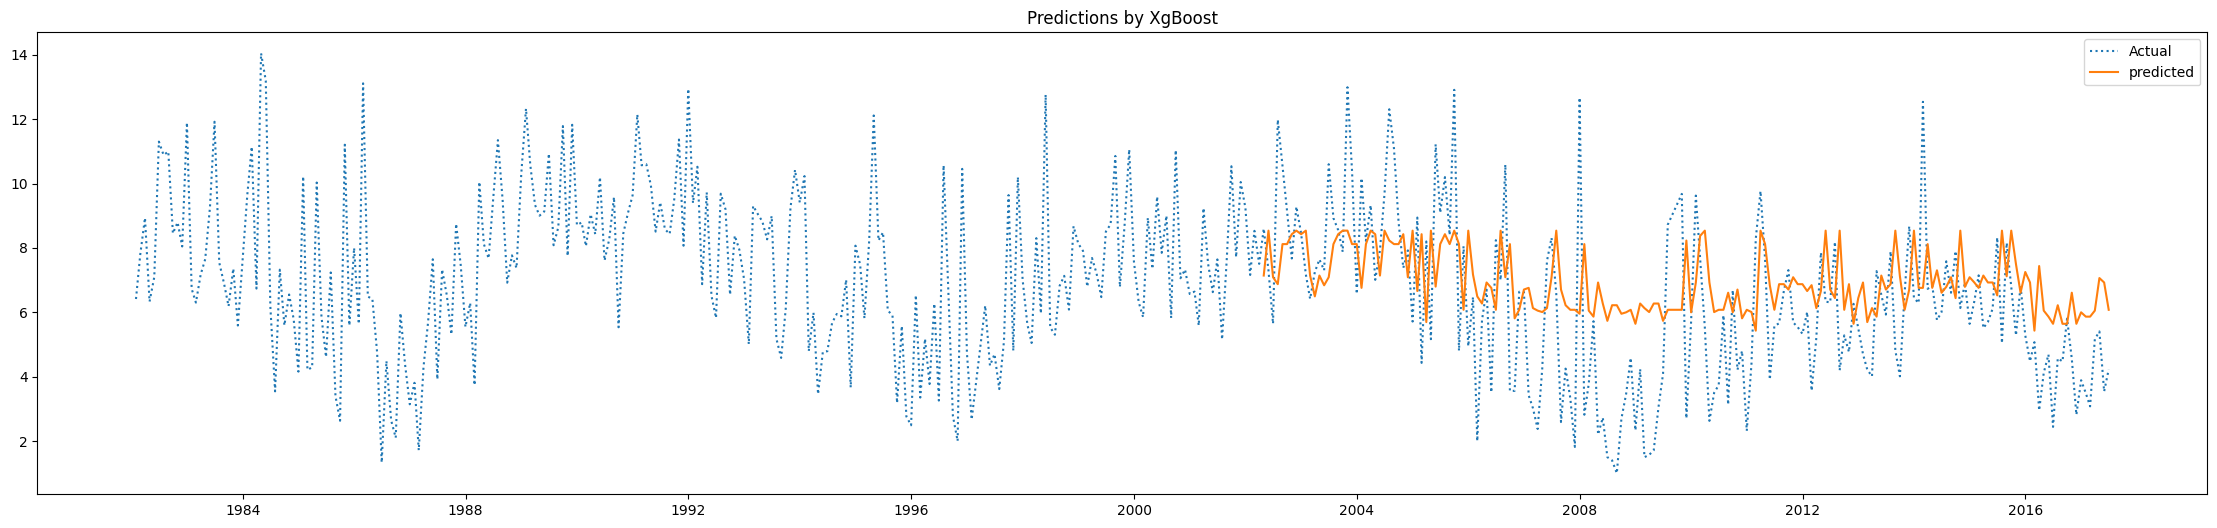

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by XgBoost")
plt.legend()

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 1.9599097727737582


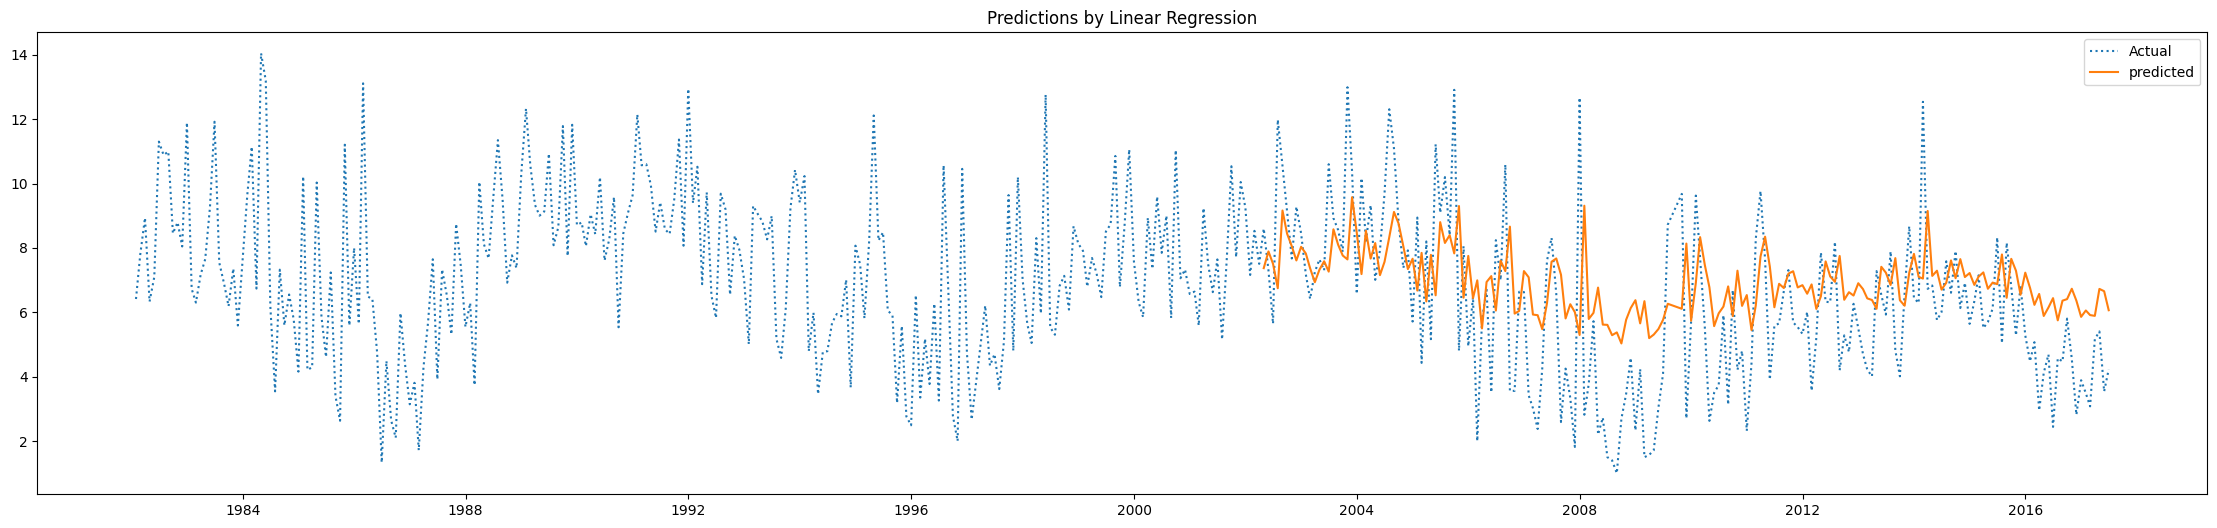

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by Linear Regression")
plt.legend()

##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 2.0963096711017974


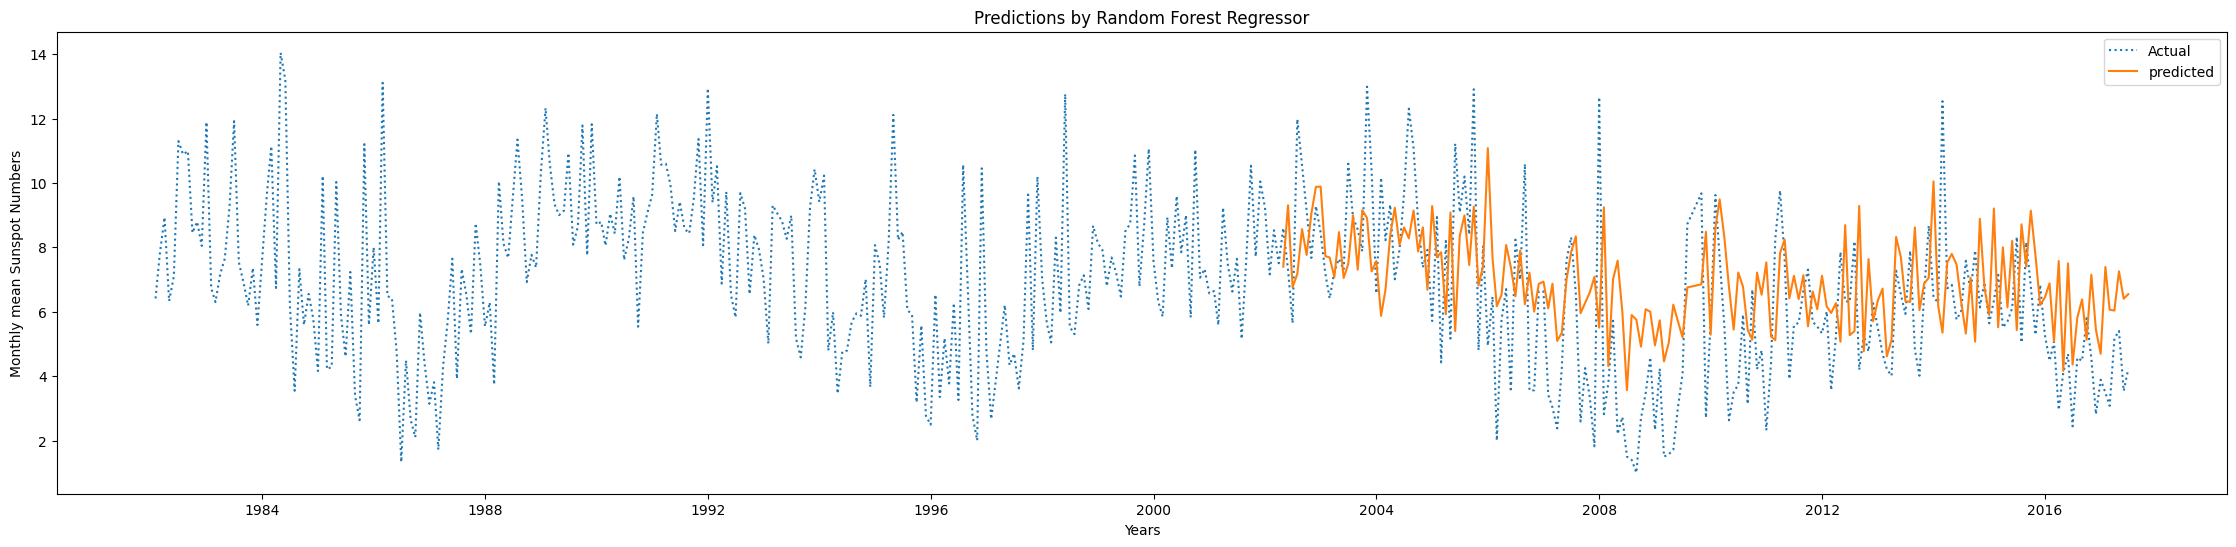

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by Random Forest Regressor")
plt.ylabel("Monthly mean Sunspot Numbers")
plt.xlabel("Years")
plt.legend()

##DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 2.69008801516849


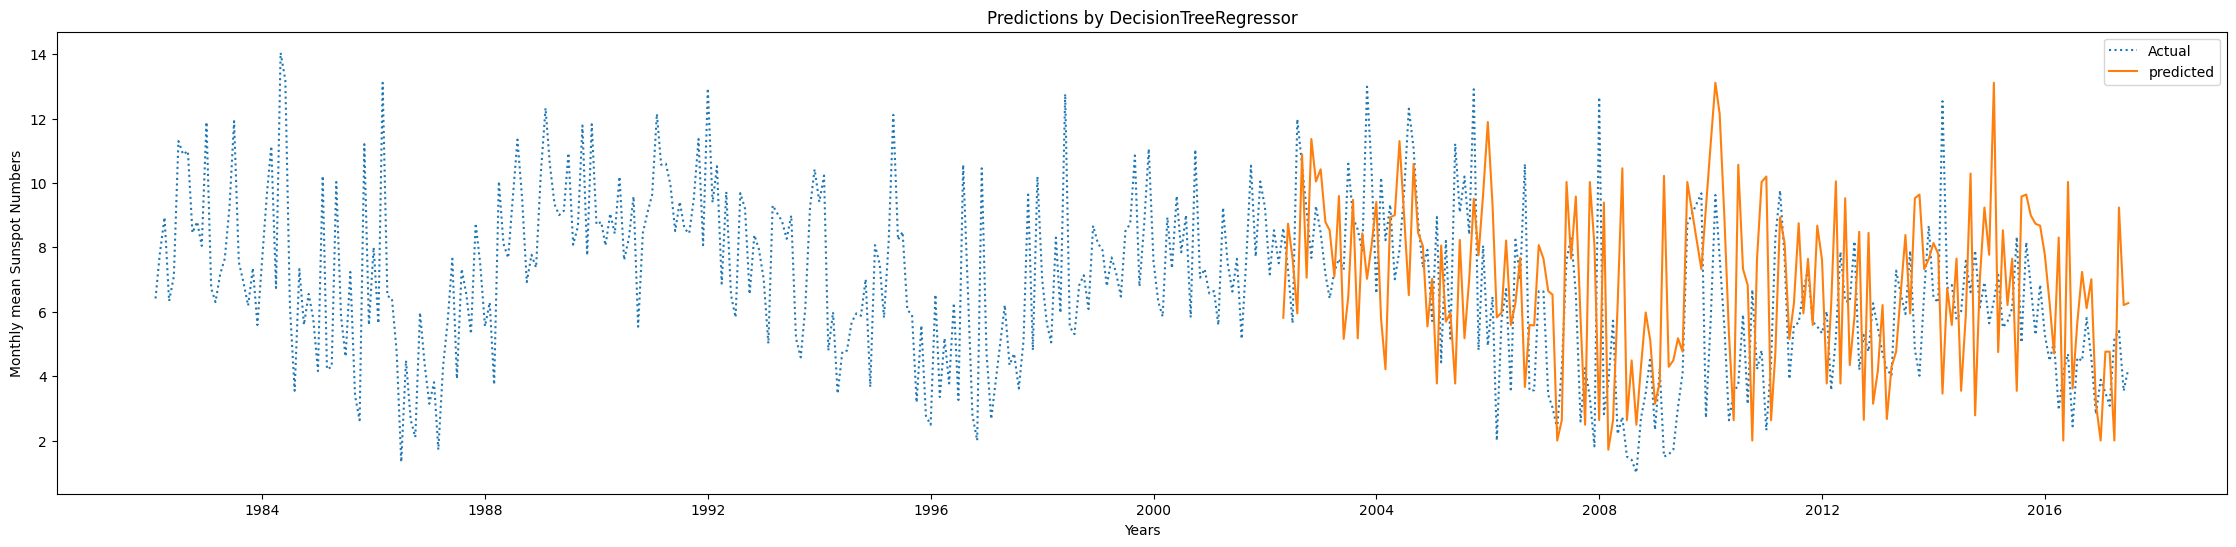

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by DecisionTreeRegressor")
plt.ylabel("Monthly mean Sunspot Numbers")
plt.xlabel("Years")

plt.legend()

##Gradient Boosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 2.1570166487764744


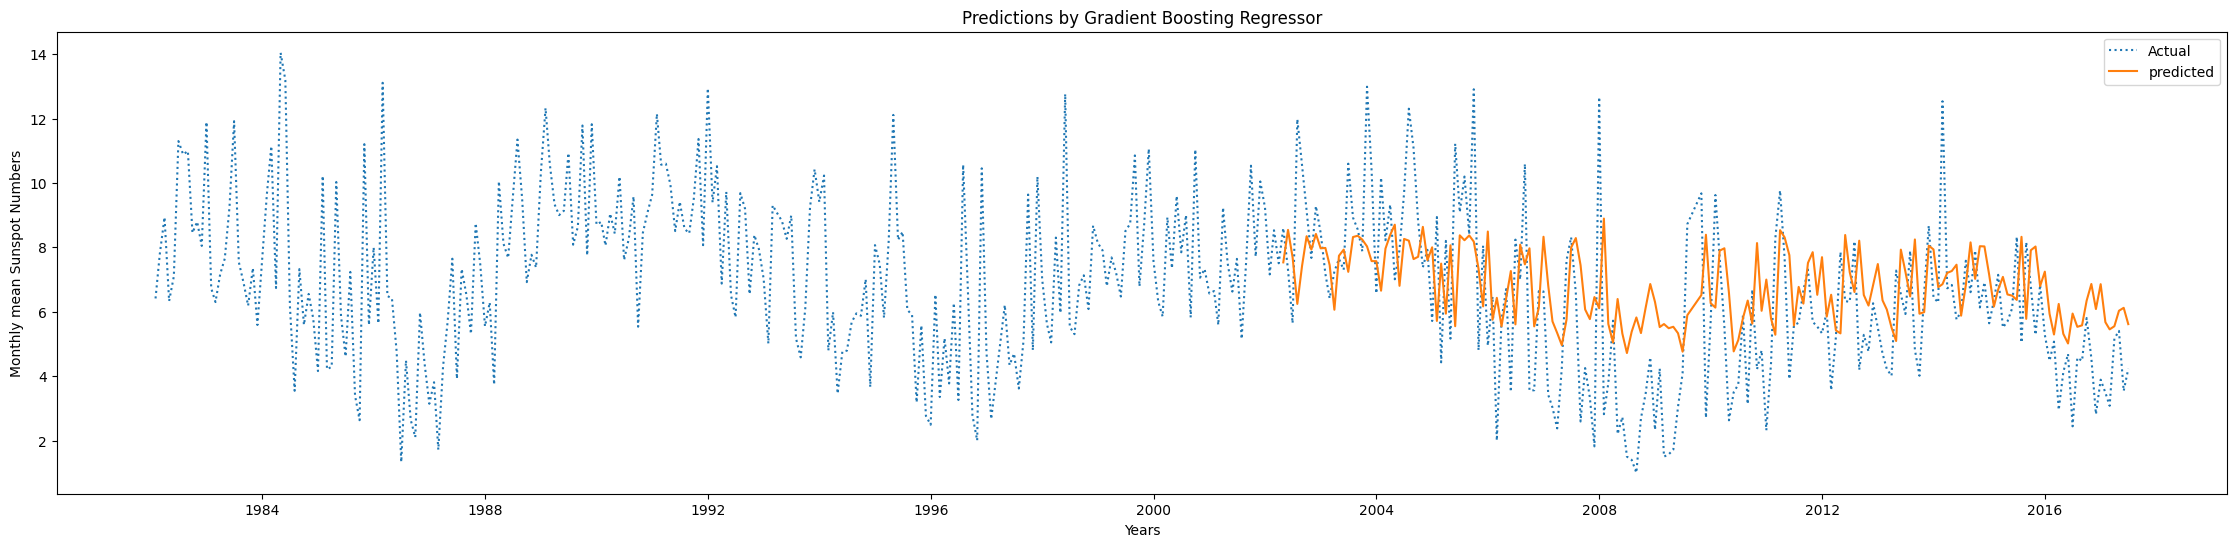

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by Gradient Boosting Regressor")
plt.ylabel("Monthly mean Sunspot Numbers")
plt.xlabel("Years")
plt.legend()

This is giving best results

##Support Vector Regression (SVR):

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Regressor model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 1.9903416162427818


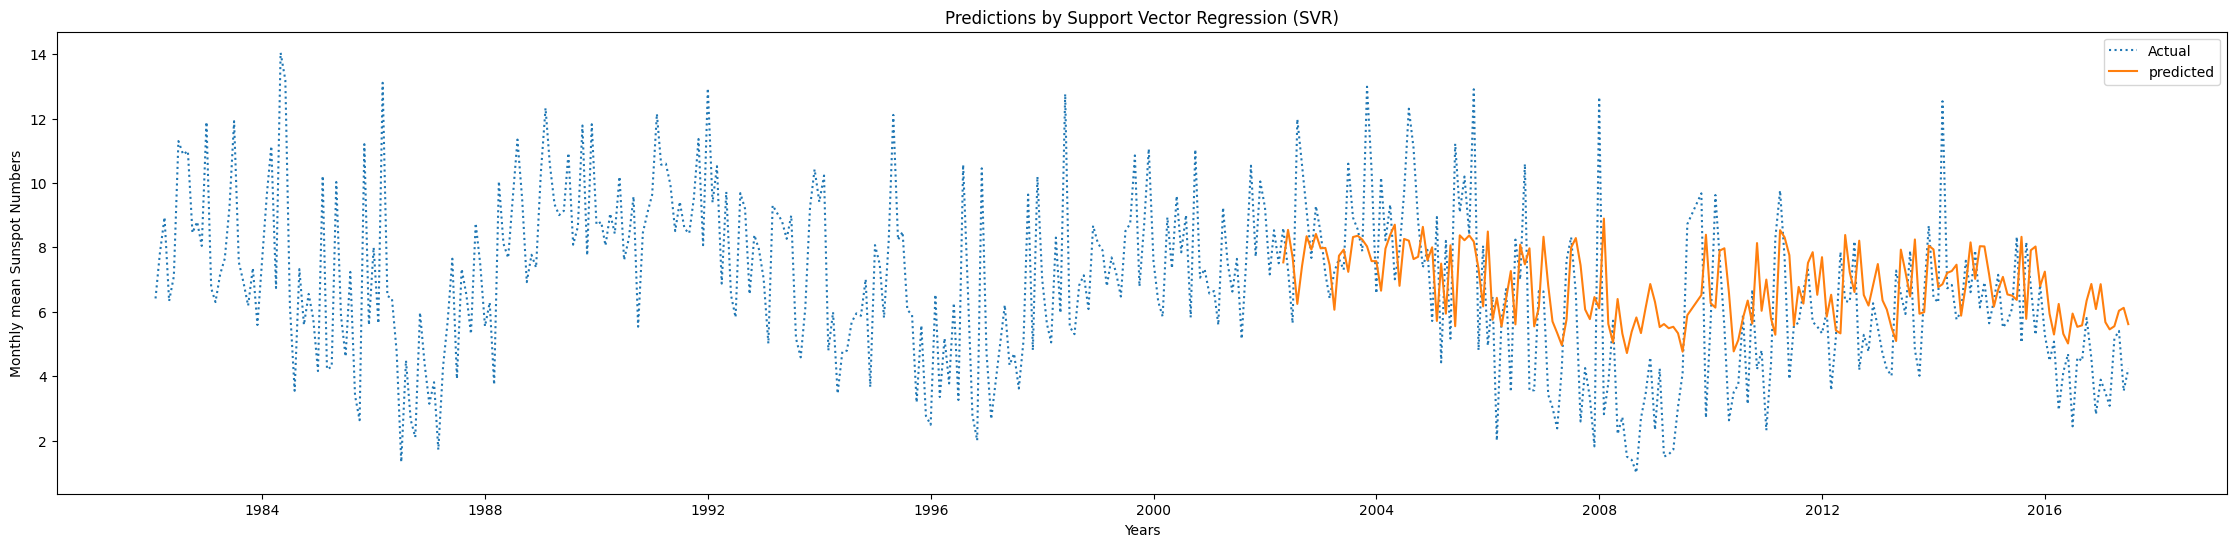

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df.index,df['value'],label="Actual",linestyle="dotted")
plt.plot(X_test.index,predictions,label="predicted",linestyle="-")
plt.title("Predictions by Support Vector Regression (SVR)")
plt.ylabel("Monthly mean Sunspot Numbers")
plt.xlabel("Years")

plt.legend()

filtered_df['Date'],filtered_df['Number of sunspots']